In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

In [2]:
rlanders = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])
rlanders.Gender = rlanders.Gender.astype('category')
likert_scale = CategoricalDtype(categories=[1,2,3,4,5], ordered=True)
rlanders.Survey = rlanders.Survey.astype(likert_scale)
# rlanders.info()
# rlanders.Survey.dtype

In [3]:
pd.crosstab(rlanders.Survey, rlanders.Gender, margins=True)

Gender,Female,Male,All
Survey,,,
1,0,4,4
2,17,45,62
3,23,91,114
4,12,53,65
5,0,5,5
All,52,198,250


1. Formulate the hypotheses:
   - $H_0$: There is no association between the variables (the differences between observed and expected values are small)
   - $H_1$: There is an association between the variables (the differences are large)
2. Choose significance level $\alpha$
3. Calculate the value of the test statistic in the sample (here: $\chi^2$).
4. Use one of the following methods (based on the degrees of freedom $df = (r-1) \times (k-1)$):
   1. Determine critical value $g$ so $P(\chi^2 > g) = \alpha$
   2. Calculate the $p$-value
5. Draw a conclusion based on the outcome:
   1. $\chi^2 < g$: do not reject $H_0$; $\chi^2 > g$: reject $H_0$
   2. $p > \alpha$: do not reject $H_0$; $p < \alpha$: reject $H_0$

In [4]:
observed = pd.crosstab(rlanders.Survey, rlanders.Gender)
alpha = .05
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

Chi-squared       : 4.2555
Degrees of freedom: 4
P-value           : 0.3725


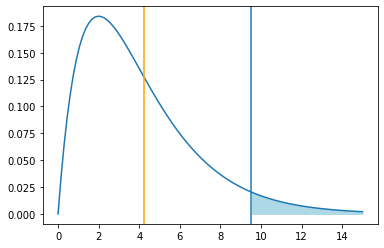

In [5]:
# Is there an association between Gender and Survey?

# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=df)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=4)  # TODO: CHECK this!

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared